# **Task 2: Data Exploratory Analysis**
Step 1: Summarise the key features and variables included in the Google Review dataset. Identify any initial patterns, trends.

Step 2: Analyse Auxiliary Dataset, perform an exploratory data analysis to investigate and uncover 2 interesting insights.

*   **First insight:** analysing the main business status in different areas.
*   **Second insight:** analysing how MISC impacts on review numbers.

Step 3: Combine data of 2 datasets and create 2 meaningful insights.


*   **Third insight:** Explore what type of store has the most reviews per day on average.
*   **Forth insight:** Explore whether there would be a correlation between response rate and average rating.



In [2]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

**Step 1.**
Open Google Review Data from task1_123.json and extract useful information for the future analysing.
Create a list "extracted_data" to save columns of "time", "review_rating", "if_pic", "if_response", "gmap_id". In the end transform to a dataframe called df1.

In [3]:
with open('/task1_output.json', 'r', encoding='utf-8') as file:
    data1 = json.load(file)

extracted_data = []

for gmap_id, details in data1.items():
    for review in details["reviews"]:
        review_data = {
            "time": review["time"],
            "review_rating": review["review_rating"],
            "if_pic": review.get("if_pic", "N"),
            "if_response": review.get("if_response", "N"),
            "gmap_id": gmap_id
        }
        extracted_data.append(review_data)

df1 = pd.DataFrame(extracted_data)
df1.head()

,time,review_rating,if_pic,if_response,gmap_id
0,2021-05-25 04:40:45,1.0,N,N,0x80dcd9affb75071b:0x7fa4541ce0963155
1,2021-02-08 18:59:40,5.0,Y,N,0x80dcd9affb75071b:0x7fa4541ce0963155
2,2021-05-25 21:33:50,5.0,N,N,0x80dcd9affb75071b:0x7fa4541ce0963155
3,2018-07-11 00:03:40,1.0,Y,N,0x80dcd9affb75071b:0x7fa4541ce0963155
4,2020-12-14 17:11:05,5.0,N,N,0x80dcd9affb75071b:0x7fa4541ce0963155


Use describe function to take a look at data details, in total there are 36150 records.
"time": most time is unique.
"if_pic": most businesses do not have pictures provided by reviewers.
"if_response": most business owners do not response reviews.

In [4]:
df1.describe(include=['O'])

,time,if_pic,if_response,gmap_id
count,36150,36150,36150,36150
unique,35352,2,2,176
top,2018-12-24 20:24:11,N,N,0x8083dd295e948a1b:0x24df5252e55104f4
freq,3,35186,30185,2324


1. 'if_response' only has 'Y' and 'N' two options, if 'Y' then 'if_response_num' will be 1,  if 'N' will be 0.
2. Then aggregates the data to calculate the average of review_rating and if_response_num for each gmap_id.
3. It's sorted by response rate, the result shows responding to reviews may have an impact on the review ratings.

In [5]:
df1['if_response_num'] = (df1['if_response'] == 'Y').astype(int)

average_values = df1.groupby('gmap_id').agg({
    'review_rating': 'mean',
    'if_response_num': 'mean'
}).reset_index()

average_values.rename(columns={
    'review_rating': 'average_review_rating',
    'if_response_num': 'average_if_response_Y'
}, inplace=True)

average_values_sorted = average_values.sort_values(by='average_if_response_Y', ascending=False).reset_index(drop=True)
average_values_sorted

,gmap_id,average_review_rating,average_if_response_Y
0,0x80c2ba867a86c48f:0x24d0de50de7283bf,4.913793,1.000000
1,0x80945d1f96be0d41:0xeb88c714c179c87f,4.655172,1.000000
2,0x808fe9c39e4a232b:0x802ba402280737da,4.666667,0.981481
3,0x809a59e6895ef6a9:0x4a837969e905a449,4.545455,0.909091
4,0x80d95377f219043b:0x920ef9bbc9a02185,4.561798,0.865169
...,...,...,...
171,0x80952f37dcae474b:0xb74226badfe94d15,4.493333,0.000000
172,0x8094f8560e666563:0x803d365260fae3aa,4.603448,0.000000
173,0x809468b86b29ced5:0x8140ab9976084366,4.558824,0.000000
174,0x809467e6ef941a9f:0x9cc808cbdc259cc5,4.428571,0.000000


**Step 2.**
Using Auxiliary Dataset create 2 interesting insights.

In [6]:
data = []
with open('/meta-California.json', 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

Load data and take a look at first 3 rows

In [7]:
df = pd.DataFrame(data)
df.head(3)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.21529,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
1,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.23293,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


From the result, there are 515961 entries, some columns have a lot of missing values, for example 'description' and 'price' may not be useful for the analysing.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515961 entries, 0 to 515960
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              515951 non-null  object 
 1   address           508257 non-null  object 
 2   gmap_id           515961 non-null  object 
 3   description       111921 non-null  object 
 4   latitude          515961 non-null  float64
 5   longitude         515961 non-null  float64
 6   category          513585 non-null  object 
 7   avg_rating        515961 non-null  float64
 8   num_of_reviews    515961 non-null  int64  
 9   price             109801 non-null  object 
 10  hours             414982 non-null  object 
 11  MISC              433038 non-null  object 
 12  state             372248 non-null  object 
 13  relative_results  475497 non-null  object 
 14  url               515961 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 59.0+ MB


In [9]:
df = df.drop(columns=['description', 'latitude', 'longitude', 'price', 'hours', 'relative_results', 'url'])
df.head(3)

,name,address,gmap_id,category,avg_rating,num_of_reviews,MISC,state
0,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,[Textile exporter],4.5,6,None,Open now
1,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,[Korean restaurant],4.4,18,"{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM
2,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,[Fabric store],3.3,6,"{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM


Average rating is 4.27 and average number of views is 137.

In [10]:
df.describe()

,avg_rating,num_of_reviews
count,515961.000000,515961.000000
mean,4.278333,136.696334
std,0.627410,375.423986
min,1.000000,1.000000
25%,4.000000,8.000000
50%,4.400000,33.000000
75%,4.700000,108.000000
max,5.000000,9998.000000


This function extract suburb/area name from address

In [11]:
def area_name(address):
    if address:
        match = re.search(r",\s*([A-Za-z\s]+?),\s*\w{2}\s*\d{5}", address)
        if match:
            return match.group(1).strip()
    return None

Add a new column "area", recording each business's area name.

In [12]:
df['area'] = df['address'].apply(area_name)
df.head(3)

,name,address,gmap_id,category,avg_rating,num_of_reviews,MISC,state,area
0,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,[Textile exporter],4.5,6,None,Open now,Los Angeles
1,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,[Korean restaurant],4.4,18,"{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,Los Angeles
2,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,[Fabric store],3.3,6,"{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,Los Angeles


Now we don't need "address" column and drop it.

In [13]:
df.drop('address', axis=1, inplace=True)
df.head(3)

,name,gmap_id,category,avg_rating,num_of_reviews,MISC,state,area
0,City Textile,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,[Textile exporter],4.5,6,None,Open now,Los Angeles
1,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,[Korean restaurant],4.4,18,"{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,Los Angeles
2,Nova Fabrics,0x80c2c89923b27a41:0x32041559418d447,[Fabric store],3.3,6,"{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,Los Angeles


**First insight:** analysing the main business status in different areas.

First count the number of business by area, the result only shows counts which are over than the average.

Los Angeles has the largest number of businesses, followed by San Diego, San Francisco, Sacramento and so on.

In [14]:
total_counts_by_area = df['area'].value_counts()
average_count = total_counts_by_area.mean()
total_counts_by_area = total_counts_by_area[total_counts_by_area > average_count]
total_counts_by_area

,count
area,
Los Angeles,31678
San Diego,20682
San Francisco,17190
Sacramento,11283
San Jose,10192
...,...
North Hills,329
Pismo Beach,329
Lemoore,328


"Permanently closed" has 33500 counts which is higher than "open 24 hours" business.We can analyse these 2 main status.

In [15]:
df['state'].value_counts()

,count
state,
Permanently closed,33500
Open 24 hours,22396
Closed ⋅ Opens 9AM,19828
Closed ⋅ Opens 10AM,17564
Closed ⋅ Opens 8AM,17457
...,...
Closes soon ⋅ 5:30AM ⋅ Reopens 9AM,1
Open ⋅ Closes 8:01PM,1
Closes soon ⋅ 9:30AM ⋅ Reopens 3:30PM,1


Choose the same range of "total_counts_by_area", count the number of closed businesses by area.
Los Angeles has 2482 permanently closed business which is top 1 of the list, followed by San Francisco, San Diego.

In [16]:
closed_state_df = df[df['state'] == 'Permanently closed']
closed_counts = closed_state_df['area'].value_counts()
closed_counts = closed_counts[closed_counts.index.isin(total_counts_by_area.index)]
closed_counts

,count
area,
Los Angeles,2482
San Francisco,1991
San Diego,1637
San Jose,822
Sacramento,767
...,...
Atwater,12
Banning,11
Vernon,10


Do the same as perivous cell, just this time we analyse businesses of "open 24 hours".
Los Angeles has 1442 counts, then it's San Diego and San Francisco.

In [17]:
all_day_open_df = df[df['state'] == 'Open 24 hours']
all_day_open_counts = all_day_open_df['area'].value_counts()
all_day_open_counts = all_day_open_counts[all_day_open_counts.index.isin(total_counts_by_area.index)]
all_day_open_counts

,count
area,
Los Angeles,1442
San Diego,1096
San Francisco,594
Sacramento,427
San Jose,375
...,...
Healdsburg,6
Half Moon Bay,6
Capitola,6


Create a data frame to save total counts, permanently closed counts and open 24 hours counts.

In [18]:
area_counts_df = pd.DataFrame({
    'Total': total_counts_by_area,
    'Permanently Closed': closed_counts,
    'Open 24 Hours': all_day_open_counts
})

area_counts_df = area_counts_df.fillna(0).astype(int)

Compare closed ratio and open 24 hour ratio, sort values by total counts.
Result shows where businesses are located with ratios.

In [19]:
area_counts_df['Closed Ratio'] = area_counts_df['Permanently Closed'] / area_counts_df['Total']
area_counts_df['Open 24 hours Ratio'] = area_counts_df['Open 24 Hours'] / area_counts_df['Total']
area_counts_df = area_counts_df.sort_values(by='Total', ascending=False)
area_counts_df

,Total,Permanently Closed,Open 24 Hours,Closed Ratio,Open 24 hours Ratio
area,,,,,
Los Angeles,31678,2482,1442,0.078351,0.045521
San Diego,20682,1637,1096,0.079151,0.052993
San Francisco,17190,1991,594,0.115823,0.034555
Sacramento,11283,767,427,0.067978,0.037845
San Jose,10192,822,375,0.080651,0.036794
...,...,...,...,...,...
North Hills,329,17,14,0.051672,0.042553
Pismo Beach,329,19,8,0.057751,0.024316
Lemoore,328,15,12,0.045732,0.036585


Get top 5 high closed ratio areas.

In [20]:
high_closed_ratio_areas = area_counts_df.sort_values(by='Closed Ratio', ascending=False).head(5)

high_closed_ratio_names = high_closed_ratio_areas.index.tolist()
high_closed_ratio_names

['Paradise', 'Rowland Heights', 'Venice', 'Cupertino', 'West Hollywood']

The plot shows "Paradise" area's closed ratio is significantly about twice higher than other 4 areas. So it's better not start a business in this area.

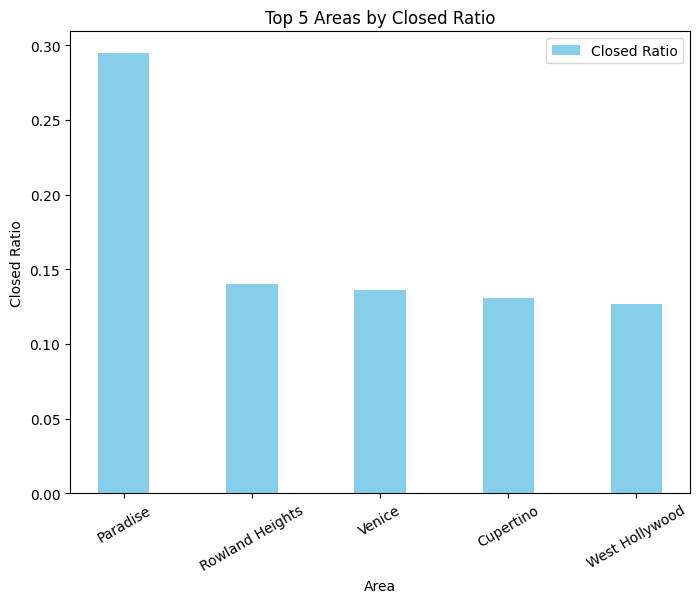

In [21]:
plt.figure(figsize=(8, 6))

# Plot Closed Ratio
plt.bar(high_closed_ratio_names, high_closed_ratio_areas['Closed Ratio'], width=0.4, color='skyblue', label='Closed Ratio')

plt.xlabel('Area')
plt.ylabel('Closed Ratio')
plt.title('Top 5 Areas by Closed Ratio')
plt.xticks(rotation=30)
plt.legend()

plt.show()

Get top 5 high open 24 hours ratio areas.

In [22]:
high_open_ratio_areas = area_counts_df.sort_values(by='Open 24 hours Ratio', ascending=False).head(5)

high_open_ratio_names = high_open_ratio_areas.index.tolist()
high_open_ratio_names

['Twentynine Palms', 'Barstow', 'Calexico', 'El Segundo', 'Perris']

In these areas, open ratio is about 0.07-0.08. It's likely to find more 24 hours business than other places.

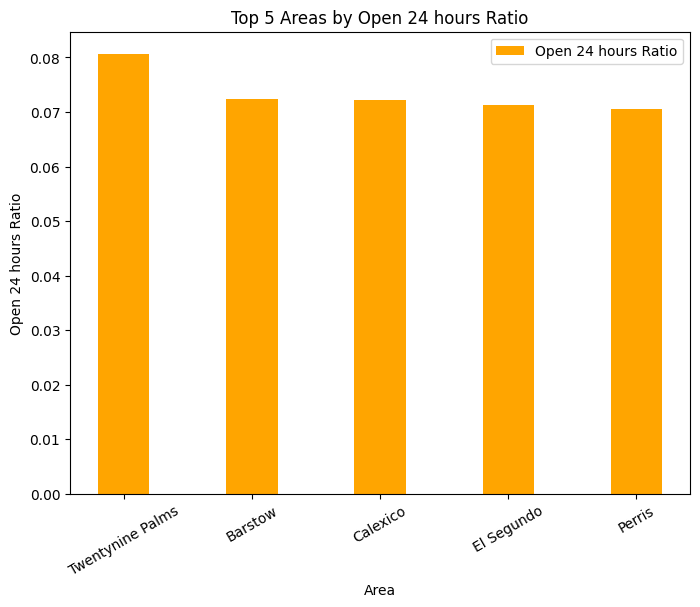

In [23]:
plt.figure(figsize=(8, 6))

# Plot Open 24 hours Ratio
plt.bar(high_open_ratio_names, high_open_ratio_areas['Open 24 hours Ratio'], width=0.4, color='orange', label='Open 24 hours Ratio')

plt.xlabel('Area')
plt.ylabel('Open 24 hours Ratio')
plt.title('Top 5 Areas by Open 24 hours Ratio')
plt.xticks(rotation=30)
plt.legend()

plt.show()

Select 5 main areas with the most business counts, observe closed and open rate.
San Francisco has a high closed rate and low open 24 hours rate, it may not be a good option for people to start a business comparing to other 4 main areas..

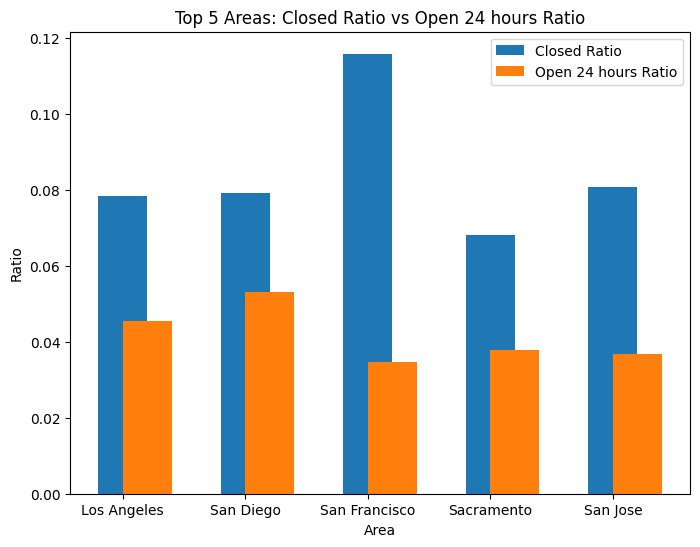

In [24]:
# Select the top 5 areas
top_5_areas = area_counts_df.head(5)

plt.figure(figsize=(8, 6))
plt.bar(top_5_areas.index, top_5_areas['Closed Ratio'], width=0.4, label='Closed Ratio', align='center')
plt.bar(top_5_areas.index, top_5_areas['Open 24 hours Ratio'], width=0.4, label='Open 24 hours Ratio', align='edge')

plt.xlabel('Area')
plt.ylabel('Ratio')
plt.title('Top 5 Areas: Closed Ratio vs Open 24 hours Ratio')
plt.legend()

# Show the plot
plt.show()

**Second insight:** analysing how MISC impacts on review numbers.

Get keys from nested dictionary. Result shows service options provided by businesses.

In [25]:
def misc_keys(misc):
    if isinstance(misc, dict):
        return list(misc.keys())
    return []

df['MISC_keys'] = df['MISC'].apply(misc_keys)
all_keys = [key for sublist in df['MISC_keys'] for key in sublist]

misc_counts = pd.Series(all_keys).value_counts()
misc_counts

,count
Accessibility,389931
Service options,218409
Planning,153185
Amenities,149017
Payments,128612
Offerings,128171
Health & safety,108264
Atmosphere,85719
Popular for,78440
Crowd,77420


Due to amount of the options, only choose misc counts which are higher than 100000.

In [26]:
misc_counts_over_100k = misc_counts[misc_counts > 100000]
misc_counts_over_100k

,count
Accessibility,389931
Service options,218409
Planning,153185
Amenities,149017
Payments,128612
Offerings,128171
Health & safety,108264


Count sum of review numbers whether with which misc service.

In [27]:
def count_reviews_with_service(df, service_name):
    if_service = df['MISC'].apply(lambda x: service_name in x if isinstance(x, dict) else False)

    with_service = df[if_service]['num_of_reviews'].sum()
    without_service = df[~if_service]['num_of_reviews'].sum()

    return with_service, without_service

Create a data frame highlights service, review numbers with/without service.

In [28]:
services = misc_counts_over_100k.index.tolist()
service_list = []

for service in services:
    with_service, without_service = count_reviews_with_service(df, service)
    service_list.append({'Service': service, 'Review numbers with service': with_service, 'Review numbers without service': without_service})

service_df = pd.DataFrame(service_list)
service_df

,Service,Review numbers with service,Review numbers without service
0,Accessibility,62606851,7923126
1,Service options,48894553,21635424
2,Planning,28215398,42314579
3,Amenities,38683016,31846961
4,Payments,35015330,35514647
5,Offerings,36173953,34356024
6,Health & safety,30416306,40113671


In general with service provided has a higher review numbers, which means the service may help owners get more visitors by the increasing of reviews.
There are 2 interesting insights.
1. "Accessibility" is essential for the business, review numbers are really high if the service is available.
2. For planning and health & safety, review numbers without service is even higher than with service, which means if business owners don't provide the service may attract more visitors.

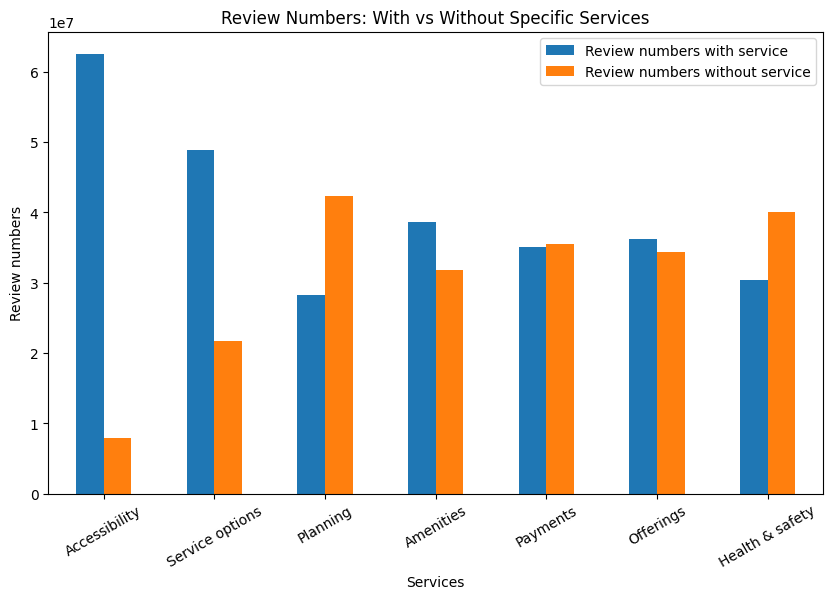

In [29]:
service_df.set_index('Service').plot(kind='bar', figsize=(10, 6))
plt.title('Review Numbers: With vs Without Specific Services')
plt.ylabel('Review numbers')
plt.xlabel('Services')
plt.xticks(rotation=30)
plt.show()

Get values from misc nested dictionary to take a look at details.

In [30]:
def extract_details(misc, key):
    if isinstance(misc, dict) and key in misc:
        return misc[key]
    return []

From result, there are top 5 options of Accessibility which all of them include "Wheelchair".

In [31]:
# Extracting and counting values for 'Accessibility'
df['Accessibility_values'] = df['MISC'].apply(lambda x: extract_details(x, 'Accessibility'))
all_accessibility = [item for sublist in df['Accessibility_values'] for item in sublist]
accessibility_counts = pd.Series(all_accessibility).value_counts().head(5)
accessibility_counts

,count
Wheelchair accessible entrance,381418
Wheelchair accessible parking lot,65429
Wheelchair accessible restroom,42063
Wheelchair accessible seating,28151
Wheelchair accessible elevator,9059


The plot shows "Wheelchair accessible entrance" is the main option of Accessibility. So this option is very good for business.

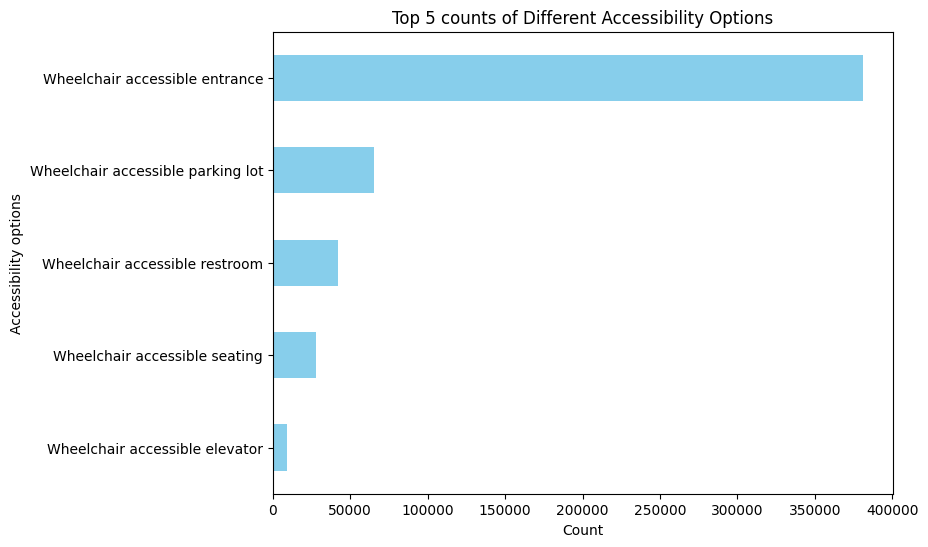

In [32]:
plt.figure(figsize=(8, 6))
accessibility_counts.sort_values().plot(kind='barh', color='skyblue')

plt.xlabel('Count')
plt.ylabel('Accessibility options')
plt.title('Top 5 counts of Different Accessibility Options')
plt.show()

For the service of 'Planning', there are top 5 options.

In [33]:
# Extracting and counting values for 'Planning'
df['Planning_values'] = df['MISC'].apply(lambda x: extract_details(x, 'Planning'))
all_planning = [item for sublist in df['Planning_values'] for item in sublist]
planning_counts = pd.Series(all_planning).value_counts().head(5)
planning_counts

,count
Quick visit,75465
Appointments recommended,48509
Accepts reservations,19932
LGBTQ friendly,9834
Usually a wait,6520


The pie chart shows 47.1% is quick visit, 30.3% is appointments recommended.

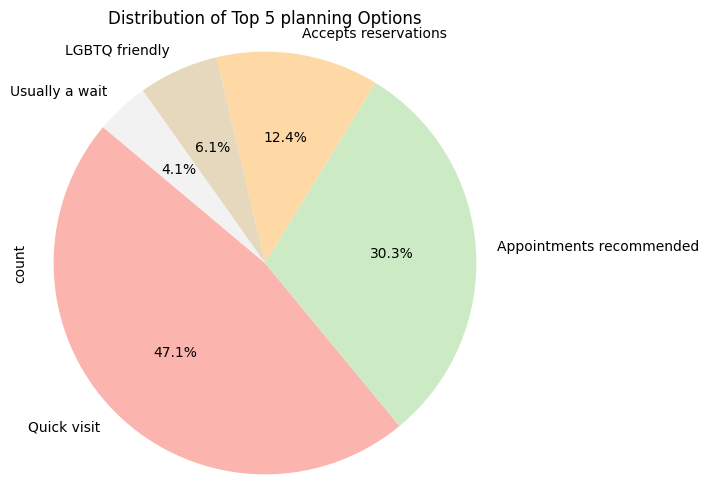

In [34]:
plt.figure(figsize=(6, 6))
planning_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Pastel1')

plt.title('Distribution of Top 5 planning Options')
plt.axis('equal')
plt.show()

For the service of 'health & safety', there are top 5 options.

In [35]:
# Extracting and counting values for 'Health & safety'
df['Health_safety_values'] = df['MISC'].apply(lambda x: extract_details(x, 'Health & safety'))
all_health_safety = [item for sublist in df['Health_safety_values'] for item in sublist]
health_safety_counts = pd.Series(all_health_safety).value_counts().head(5)
health_safety_counts # We found reasons!!

,count
Mask required,97315
Staff required to disinfect surfaces between visits,64923
Staff wear masks,38050
Safety dividers at checkout,25778
Staff get temperature checks,21026


39.4% is mask required and 26.3% is disinfect surfaces. These two options are very unpopluar and limit vistors to come, that's the reason why without this service have more reviews.

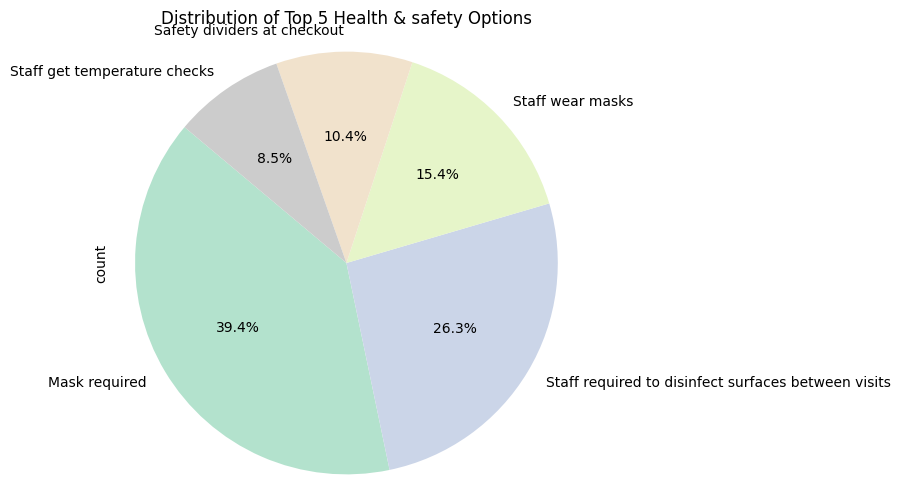

In [36]:
plt.figure(figsize=(6, 6))
health_safety_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Pastel2')

plt.title('Distribution of Top 5 Health & safety Options')
plt.axis('equal')
plt.show()

**Step 3**: Combine data of 2 datasets and create 2 meaningful insights.

**Third insight:** Explore what type of store has the most reviews per day on average.

I think this can represent the type of store that people visit every day, and what type of service they care about most.

First, I extracted the gmap_id and time from the google_review data. In order to achieve the results later, I first extracted the earliest comment time and the latest comment time of each store.

In [37]:
df3 = df1[['time', 'gmap_id']]
time_range = df3.groupby('gmap_id').agg({
    'time': ['min', 'max']
}).reset_index()
time_range.columns = ['gmap_id', 'min_time', 'max_time']
time_range

,gmap_id,min_time,max_time
0,0x14e1b14b311075e3:0x9bd0ba6a0d6a2607,2015-03-26 23:45:23,2021-05-28 00:52:22
1,0x153258bc13ebe91b:0xe8e094d783954445,2016-02-18 20:56:07,2021-06-22 18:58:03
2,0x54d06637e4754479:0xf72ea0d803f429c8,2018-06-05 14:16:12,2021-05-12 13:49:01
3,0x54d067cd20f06437:0x495f2eccc46d224c,2017-05-31 04:19:40,2021-05-25 16:03:52
4,0x54d15705bd8bbba1:0xd510884aea4783fb,2016-11-11 19:42:26,2021-05-16 04:47:49
...,...,...,...
171,0x80e9147c21bcad4b:0xade63165cdbff00b,2015-08-14 00:15:05,2019-01-12 09:25:39
172,0x80e9147f17be42a9:0x387ea2e49e87854a,2017-09-24 22:13:36,2021-05-01 19:51:16
173,0x80ea41048aa63305:0xff376c428d67ef3f,2019-03-31 21:38:30,2021-06-06 12:17:31
174,0x80ea437038380fa7:0x7e84a72fd7ce2a8d,2021-01-05 06:23:10,2021-08-03 02:22:03


Second, I extracted 'name', 'gmap_id', 'num_of_reviews', and 'category' from meta-california data. And combined it with the data extracted from google_review based on gmap_id.

In [38]:
df4 = df[['name', 'gmap_id', 'num_of_reviews', 'category']]
df_merge = pd.merge(time_range, df4, on='gmap_id', how='inner')
df_merge

,gmap_id,min_time,max_time,name,num_of_reviews,category
0,0x14e1b14b311075e3:0x9bd0ba6a0d6a2607,2015-03-26 23:45:23,2021-05-28 00:52:22,James Barber Shop,58,[Barber shop]
1,0x153258bc13ebe91b:0xe8e094d783954445,2016-02-18 20:56:07,2021-06-22 18:58:03,The Pampered Pet Grooming & Spa,88,[Pet groomer]
2,0x54d06637e4754479:0xf72ea0d803f429c8,2018-06-05 14:16:12,2021-05-12 13:49:01,Econo Wash Laundromat,88,[Laundromat]
3,0x54d067cd20f06437:0x495f2eccc46d224c,2017-05-31 04:19:40,2021-05-25 16:03:52,Ocean's 675 by Northwoods,178,"[Seafood restaurant, American restaurant, Cock..."
4,0x54d15705bd8bbba1:0xd510884aea4783fb,2016-11-11 19:42:26,2021-05-16 04:47:49,Roman's Kitchen,213,[Hamburger restaurant]
...,...,...,...,...,...,...
171,0x80e9147c21bcad4b:0xade63165cdbff00b,2015-08-14 00:15:05,2019-01-12 09:25:39,Saks OFF 5TH,88,"[Store, Children's clothing store, Fashion acc..."
172,0x80e9147f17be42a9:0x387ea2e49e87854a,2017-09-24 22:13:36,2021-05-01 19:51:16,Rudy’s Mexican Restaurant Presidio,178,[Mexican restaurant]
173,0x80ea41048aa63305:0xff376c428d67ef3f,2019-03-31 21:38:30,2021-06-06 12:17:31,BEST BUY FURNITURE,78,[Furniture store]
174,0x80ea437038380fa7:0x7e84a72fd7ce2a8d,2021-01-05 06:23:10,2021-08-03 02:22:03,Mattress By Appointment,68,[Mattress store]


Third, I use the earliest review time minus the latest review time, and we get time_span_days, which I assume is the number of days the store has been open. The average number of comments per day was then calculated.

In [39]:
df_merge['min_time'] = pd.to_datetime(df_merge['min_time'])
df_merge['max_time'] = pd.to_datetime(df_merge['max_time'])

df_merge['time_span_days'] = (df_merge['max_time'] - df_merge['min_time']).dt.days
# if the day is less than 1, we will set to 1
df_merge['time_span_days'] = df_merge['time_span_days'].replace(0, 1)

df_merge['reviews_per_day'] = df_merge['num_of_reviews'] / df_merge['time_span_days']

df_merge_sorted = df_merge.sort_values(by='reviews_per_day', ascending=False).reset_index(drop=True)
df_merge_sorted.head(10)

,gmap_id,min_time,max_time,name,num_of_reviews,category,time_span_days,reviews_per_day
0,0x80dcd79302f3f9f5:0xe8fa77047277dc57,2020-06-08 21:58:41,2021-08-01 04:27:13,Aptive Environmental,875,[Pest control service],418,2.093301
1,0x8083dd295e948a1b:0x24df5252e55104f4,2017-07-25 23:28:42,2021-05-28 15:19:53,Mountain Summit Financial,2324,[Loan agency],1402,1.657632
2,0x80c2bf2165245a03:0x1d6330d7f421658b,2016-06-14 18:09:34,2021-05-26 02:28:56,Hollywood Footprints,1608,"[Historical landmark, Tourist attraction]",1806,0.890365
3,0x80dd21ceeb05915f:0xd4188fef46bb853d,2020-05-05 15:19:57,2021-05-24 04:16:46,Raising Cane's Chicken Fingers,258,"[Fast food restaurant, American restaurant, Ch...",383,0.673629
4,0x80c2b58573f42603:0x62b542f344d35ac7,2016-08-28 14:56:19,2021-05-22 18:38:28,Joyful Expressions Paint & Taste,1058,"[Painting studio, Wine bar]",1728,0.612269
5,0x80ecf0c8d4b7898f:0xa092d0d2827b7bf1,2011-05-23 20:16:56,2021-06-17 03:13:29,Sunset Honda,2004,"[Honda dealer, Auto repair shop, Car dealer, C...",3677,0.545010
6,0x808e403b51ac7a8d:0x386ba36faecc99a0,2010-08-16 22:13:12,2021-06-13 23:06:00,Marianne's Ice Cream,1902,[Ice cream shop],3954,0.481032
7,0x80dcb1b01b765d13:0x184dc5dda20e0e71,2020-06-13 23:58:00,2021-06-16 19:54:37,Land Rover Riverside,158,"[Land Rover dealer, Auto parts store, Auto rep...",367,0.430518
8,0x80ea437038380fa7:0x7e84a72fd7ce2a8d,2021-01-05 06:23:10,2021-08-03 02:22:03,Mattress By Appointment,68,[Mattress store],209,0.325359
9,0x80c2c91c8cc12203:0x330762646bc15f0a,2017-01-28 05:03:19,2021-05-30 01:26:20,Plaza Americana,508,"[Outlet mall, Flea market, Market, Shopping mall]",1582,0.321113


Finally, we list the top 10 store names with the average number of reviews per day. Combine result with the table, top 3 types are pest control service, loan agency and tourist attraction.

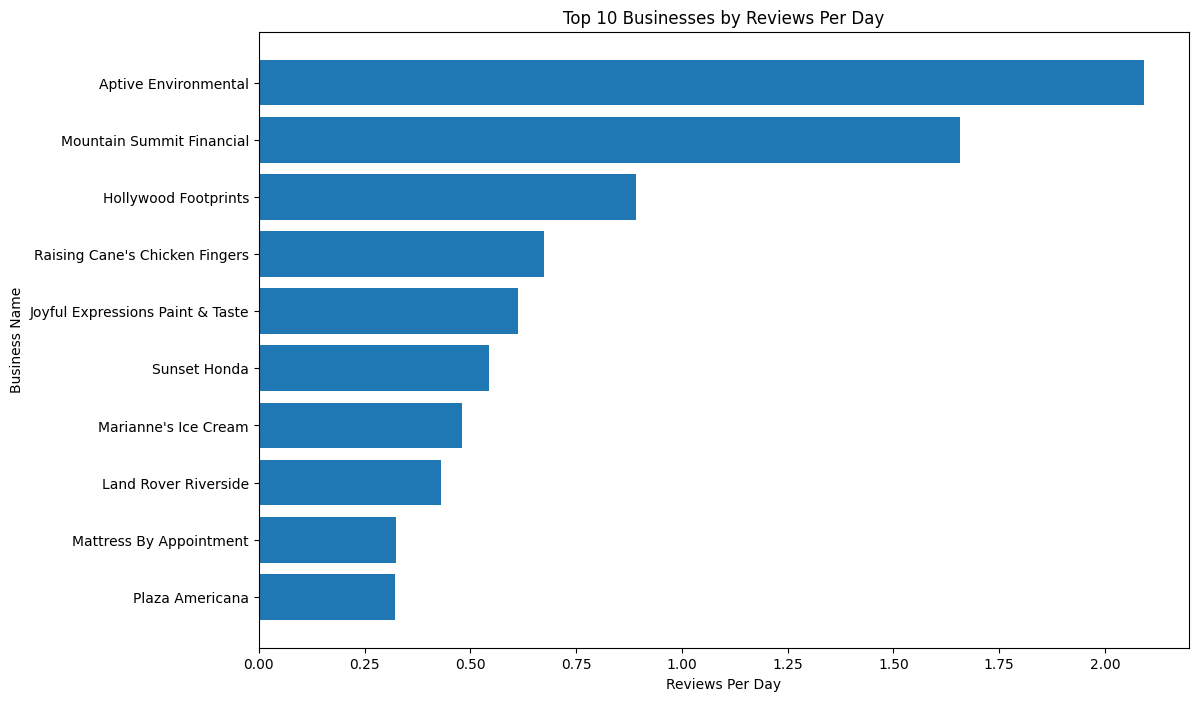

In [40]:
plt.figure(figsize=(12, 8))
plt.barh(df_merge_sorted['name'][:10], df_merge_sorted['reviews_per_day'][:10])
plt.xlabel('Reviews Per Day')
plt.ylabel('Business Name')
plt.title('Top 10 Businesses by Reviews Per Day')
plt.gca().invert_yaxis()
plt.show()

**Forth insight:** Explore whether there would be a correlation between response rate and average rating.

This may indicate whether the store will make improvements to customers' suggestions, thereby increasing customer satisfaction.

Merge 2 datasets and show the result.

In [41]:
resp_rate_merge_df = pd.merge(df1, df, on='gmap_id', how='inner')

In [42]:
resp_rate_merge_df.head()

,time,review_rating,if_pic,if_response,gmap_id,if_response_num,name,category,avg_rating,num_of_reviews,MISC,state,area,MISC_keys,Accessibility_values,Planning_values,Health_safety_values
0,2021-05-25 04:40:45,1.0,N,N,0x80dcd9affb75071b:0x7fa4541ce0963155,0,Subway,"[Sandwich shop, Caterer, Fast food restaurant,...",3.7,114,"{'Service options': ['Curbside pickup', 'No-co...",Closed ⋅ Opens 10AM,Santa Ana,"[Service options, Health & safety, Highlights,...",[Wheelchair accessible entrance],[],"[Mask required, Staff required to disinfect su..."
1,2021-02-08 18:59:40,5.0,Y,N,0x80dcd9affb75071b:0x7fa4541ce0963155,0,Subway,"[Sandwich shop, Caterer, Fast food restaurant,...",3.7,114,"{'Service options': ['Curbside pickup', 'No-co...",Closed ⋅ Opens 10AM,Santa Ana,"[Service options, Health & safety, Highlights,...",[Wheelchair accessible entrance],[],"[Mask required, Staff required to disinfect su..."
2,2021-05-25 21:33:50,5.0,N,N,0x80dcd9affb75071b:0x7fa4541ce0963155,0,Subway,"[Sandwich shop, Caterer, Fast food restaurant,...",3.7,114,"{'Service options': ['Curbside pickup', 'No-co...",Closed ⋅ Opens 10AM,Santa Ana,"[Service options, Health & safety, Highlights,...",[Wheelchair accessible entrance],[],"[Mask required, Staff required to disinfect su..."
3,2018-07-11 00:03:40,1.0,Y,N,0x80dcd9affb75071b:0x7fa4541ce0963155,0,Subway,"[Sandwich shop, Caterer, Fast food restaurant,...",3.7,114,"{'Service options': ['Curbside pickup', 'No-co...",Closed ⋅ Opens 10AM,Santa Ana,"[Service options, Health & safety, Highlights,...",[Wheelchair accessible entrance],[],"[Mask required, Staff required to disinfect su..."
4,2020-12-14 17:11:05,5.0,N,N,0x80dcd9affb75071b:0x7fa4541ce0963155,0,Subway,"[Sandwich shop, Caterer, Fast food restaurant,...",3.7,114,"{'Service options': ['Curbside pickup', 'No-co...",Closed ⋅ Opens 10AM,Santa Ana,"[Service options, Health & safety, Highlights,...",[Wheelchair accessible entrance],[],"[Mask required, Staff required to disinfect su..."


I combined the number of replies in task 1 and try to find the response rate, I extract data of if_response=Y.

In [43]:
# Filter the DataFrame for if_response = 'Y'
response_df = df1[df1['if_response'] == 'Y']

In [44]:
# Group by gmap_id
response_count = response_df.groupby('gmap_id').size().reset_index(name='if_response_Y')

I also combined the google_review data and meta-california data based on gmap_id. And divide if_response=Y by the total number of reviews to get the store response rate.

In [45]:
# Count the number of occurrences
result_df = pd.merge(response_count, df[['gmap_id', 'name', 'num_of_reviews', 'avg_rating']], on='gmap_id', how='left')
result_df['reply_rate'] = result_df['if_response_Y'] / result_df['num_of_reviews']

In [46]:
# Sort by 'reply_rate' in descending order
sorted_resp_df = result_df.sort_values(by='reply_rate', ascending=False)
sorted_resp_df = sorted_resp_df[['gmap_id', 'name', 'if_response_Y', 'num_of_reviews', 'reply_rate', 'avg_rating']]

In [47]:
sorted_resp_df.head(10)

,gmap_id,name,if_response_Y,num_of_reviews,reply_rate,avg_rating
37,0x80c2ba867a86c48f:0x24d0de50de7283bf,Life Without Laundry,58,58,1.000000,4.9
20,0x80945d1f96be0d41:0xeb88c714c179c87f,Bulldog Bowl,58,58,1.000000,4.6
14,0x808fe9c39e4a232b:0x802ba402280737da,Petals & Polish,53,54,0.981481,4.6
24,0x809a59e6895ef6a9:0x4a837969e905a449,Bean Barn 2,50,55,0.909091,4.6
52,0x80d95377f219043b:0x920ef9bbc9a02185,Joe's Stereo,154,178,0.865169,4.5
2,0x8083dd295e948a1b:0x24df5252e55104f4,Mountain Summit Financial,2003,2324,0.861876,4.6
31,0x80c2b4d2e376c297:0x861fcc08bac5fbf4,Jamba,74,87,0.850575,4.2
44,0x80c2d1ea3e28f2e3:0x733f039566bc87a2,The Joint Chiropractic,63,75,0.840000,4.9
56,0x80daf85228e4e75f:0xf3c0302ed6b3c63c,VCA Valley Animal Medical Center & Emergency H...,174,208,0.836538,2.9
65,0x80dcdebc3405cae9:0x598ac1c83a388513,Scuba.com,619,748,0.827540,4.9


Finally, through the relationship between response rate and average rating, we can see that stores with high ratings are distributed among high and low response rates, so there is not much relationship between response rate and average rating.

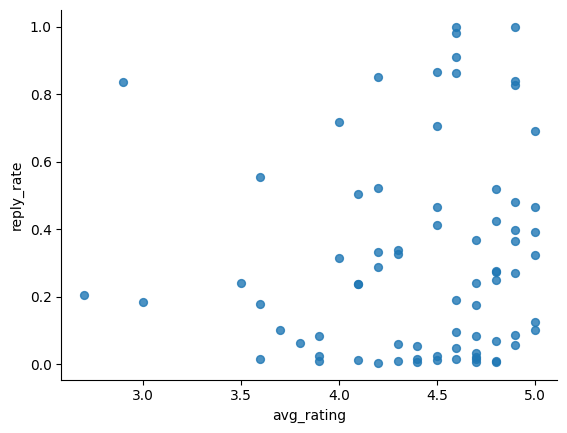

In [48]:
from matplotlib import pyplot as plt
sorted_resp_df.plot(kind='scatter', x='avg_rating', y='reply_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)